In [1]:
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2, os, glob
import random
import pandas as pd

2023-04-10 02:33:54.077171: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
np.random.seed(42)

directory = "/Users/karantovanatolij/Documents/Unis' rubbish/Golubov/fruits-360/Training"
classes = ['Apple Braeburn','Apple Crimson Snow','Apple Golden 1','Apple Golden 2',
          'Apple Golden 3','Apple Granny Smith','Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 
           'Cauliflower','Cherry 1','Cherry 2', 'Cherry Rainier', 'Cherry Wax Black',
          'Grape Blue','Grape Pink','Grape White','Grape White 2','Grape White 3','Grape White 4',
           'Grapefruit Pink','Grapefruit White','Guava','Hazelnut','Huckleberry','Kaki','Kiwi','Kohlrabi','Kumquats']
"""classes = ['Apple Braeburn','Apple Crimson Snow','Apple Golden 1','Apple Golden 2',
          'Apple Golden 3','Apple Granny Smith','Apple Pink Lady', 'Apple Red 1','Apple Red 2',
          'Apple Red 3','Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot',
          'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red','Beetroot',
          'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower','Cherry 1',
          'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut',
          'Clementine', 'Cocos', 'Corn','Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant','Fig',
          'Ginger Root', 'Granadilla','Grape Blue','Grape Pink','Grape White','Grape White 2','Grape White 3','Grape White 4',
           'Grapefruit Pink','Grapefruit White','Guava','Hazelnut','Huckleberry','Kaki','Kiwi','Kohlrabi','Kumquats','Lemon',
           'Lemon Meyer','Limes','Lychee','Mandarine','Mango','Mango Red','Mangostan','Maracuja','Melon Piel de Sapo',
           'Mulberry','Nectarine','Nectarine Flat','Nut Forest','Nut Pecan','Onion Red','Onion Red Peeled','Onion White',
           'Orange','Papaya','Passion Fruit','Peach','Peach 2','Peach Flat','Pear','Pear 2','Pear Abate',
           'Pear Forelle','Pear Kaiser','Pear Monster','Pear Red','Pear Stone','Pear Williams','Pepino','Pepper Green','Pepper Orange',
           'Pepper Red','Pepper Yellow','Physalis','Physalis with Husk','Pineapple','Pineapple Mini','Pitahaya Red',
           'Plum','Plum 2','Plum 3','Pomegranate','Pomelo Sweetie','Potato Red','Potato Red Washed','Potato Sweet','Potato White',
           'Quince','Rambutan','Raspberry','Redcurrant','Salak','Strawberry','Strawberry Wedge','Tamarillo',
           'Tangelo','Tomato 1','Tomato 2','Tomato 3','Tomato 4','Tomato Cherry Red','Tomato Heart','Tomato Maroon',
           'Tomato not Ripened','Tomato Yellow','Walnut','Watermelon']"""

all_arrays = []
img_size = 100
for i in classes:
    path = os.path.join(directory,i)
    class_num = classes.index(i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        all_arrays.append([img_array, class_num])
directory2 = "/Users/karantovanatolij/Documents/Unis' rubbish/Golubov/fruits-360/Test"
classes2 = ['Apple Braeburn','Apple Crimson Snow','Apple Golden 1','Apple Golden 2',
          'Apple Golden 3','Apple Granny Smith','Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 
           'Cauliflower','Cherry 1','Cherry 2', 'Cherry Rainier', 'Cherry Wax Black',
          'Grape Blue','Grape Pink','Grape White','Grape White 2','Grape White 3','Grape White 4',
           'Grapefruit Pink','Grapefruit White','Guava','Hazelnut','Huckleberry','Kaki','Kiwi','Kohlrabi','Kumquats']
"""classes2 = ['Apple Braeburn','Apple Crimson Snow','Apple Golden 1','Apple Golden 2',
          'Apple Golden 3','Apple Granny Smith','Apple Pink Lady', 'Apple Red 1','Apple Red 2',
          'Apple Red 3','Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot',
          'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red','Beetroot',
          'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower','Cherry 1',
          'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut',
          'Clementine', 'Cocos', 'Corn','Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant','Fig',
          'Ginger Root', 'Granadilla','Grape Blue','Grape Pink','Grape White','Grape White 2','Grape White 3','Grape White 4',
           'Grapefruit Pink','Grapefruit White','Guava','Hazelnut','Huckleberry','Kaki','Kiwi','Kohlrabi','Kumquats','Lemon',
           'Lemon Meyer','Limes','Lychee','Mandarine','Mango','Mango Red','Mangostan','Maracuja','Melon Piel de Sapo',
           'Mulberry','Nectarine','Nectarine Flat','Nut Forest','Nut Pecan','Onion Red','Onion Red Peeled','Onion White',
           'Orange','Papaya','Passion Fruit','Peach','Peach 2','Peach Flat','Pear','Pear 2','Pear Abate',
           'Pear Forelle','Pear Kaiser','Pear Monster','Pear Red','Pear Stone','Pear Williams','Pepino','Pepper Green','Pepper Orange',
           'Pepper Red','Pepper Yellow','Physalis','Physalis with Husk','Pineapple','Pineapple Mini','Pitahaya Red',
           'Plum','Plum 2','Plum 3','Pomegranate','Pomelo Sweetie','Potato Red','Potato Red Washed','Potato Sweet','Potato White',
           'Quince','Rambutan','Raspberry','Redcurrant','Salak','Strawberry','Strawberry Wedge','Tamarillo',
           'Tangelo','Tomato 1','Tomato 2','Tomato 3','Tomato 4','Tomato Cherry Red','Tomato Heart','Tomato Maroon',
           'Tomato not Ripened','Tomato Yellow','Walnut','Watermelon']"""
all_arrays2 = []
img_size = 100
for i in classes2:
    path = os.path.join(directory2,i)
    class_num2 = classes2.index(i)
    for img in os.listdir(path):
        img_array2 = cv2.imread(os.path.join(path, img))
        img_array2 = cv2.cvtColor(img_array2, cv2.COLOR_BGR2RGB)
        all_arrays2.append([img_array2, class_num2])


In [14]:
len(classes)

30

In [15]:
import random
random.shuffle(all_arrays)

X_train = []
Y_train = []
for features, label in all_arrays:
    X_train.append(features)
    Y_train.append(label)
X_train = np.array(X_train)

random.shuffle(all_arrays2)
X_test = []
Y_test = []

for features,label in all_arrays2:
    X_test.append(features)
    Y_test.append(label)
X_test = np.array(X_test)

X_train = X_train.reshape(-1, img_size, img_size,3)
X_train = X_train/255
X_test = X_test.reshape(-1, img_size, img_size,3)
X_test = X_test/255
print("shape of X_train =", X_train.shape)
print("shape of X_test =", X_test.shape)


shape of X_train = (15769, 100, 100, 3)
shape of X_test = (5285, 100, 100, 3)


In [16]:
from tensorflow.keras.utils import to_categorical


from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau



In [17]:
Y_train = to_categorical(Y_train, num_classes = 30)
Y_test = to_categorical(Y_test, num_classes = 30)
print("shape of Y_train =", Y_train.shape)
print("shape of Y_test =", Y_test.shape)
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 42)

shape of Y_train = (15769, 30)
shape of Y_test = (5285, 30)


In [18]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5),padding="Same", activation='relu', input_shape = (100, 100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(5,5),padding="Same", activation='relu', input_shape = (100, 100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(5,5),padding="Same", activation='relu', input_shape = (100, 100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(30, activation='softmax'))

In [19]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5),padding="Same", activation='relu', input_shape = (100, 100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(5,5),padding="Same", activation='relu', input_shape = (100, 100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(5,5),padding="Same", activation='relu', input_shape = (100, 100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(30, activation='softmax'))

In [20]:
optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy", ])
epochs =10
batch_size = 32


In [21]:
datagen=ImageDataGenerator(featurewise_center=False,
                           samplewise_center =False,
                           featurewise_std_normalization=False,
                           samplewise_std_normalization=False,
                           zca_whitening=False,
                           rotation_range=0.5,
                           zoom_range=0.5,
                           width_shift_range=0.5,
                           height_shift_range=0.5,
                           horizontal_flip=False,
                           vertical_flip=False)
datagen.fit(x_train)

history = model.fit(datagen.flow(x_train,y_train,batch_size=batch_size), epochs=epochs, steps_per_epoch=x_train.shape[0]//batch_size)

Epoch 1/10
394/394 [==============================] - 74s 186ms/step - loss: 1.7075 - accuracy: 0.4465
Epoch 2/10
394/394 [==============================] - 80s 202ms/step - loss: 0.5302 - accuracy: 0.8223
Epoch 3/10
394/394 [==============================] - 82s 207ms/step - loss: 0.2798 - accuracy: 0.9046
Epoch 4/10
394/394 [==============================] - 81s 205ms/step - loss: 0.2095 - accuracy: 0.9294
Epoch 5/10
394/394 [==============================] - 81s 205ms/step - loss: 0.2049 - accuracy: 0.9331
Epoch 6/10
394/394 [==============================] - 83s 210ms/step - loss: 0.1538 - accuracy: 0.9492
Epoch 7/10
394/394 [==============================] - 81s 206ms/step - loss: 0.1481 - accuracy: 0.9505
Epoch 8/10
394/394 [==============================] - 82s 209ms/step - loss: 0.1215 - accuracy: 0.9592
Epoch 9/10
394/394 [==============================] - 83s 210ms/step - loss: 0.1422 - accuracy: 0.9525
Epoch 10/10
394/394 [==============================] - 81s 207ms/step - l

395/395 [==============================] - 20s 50ms/step


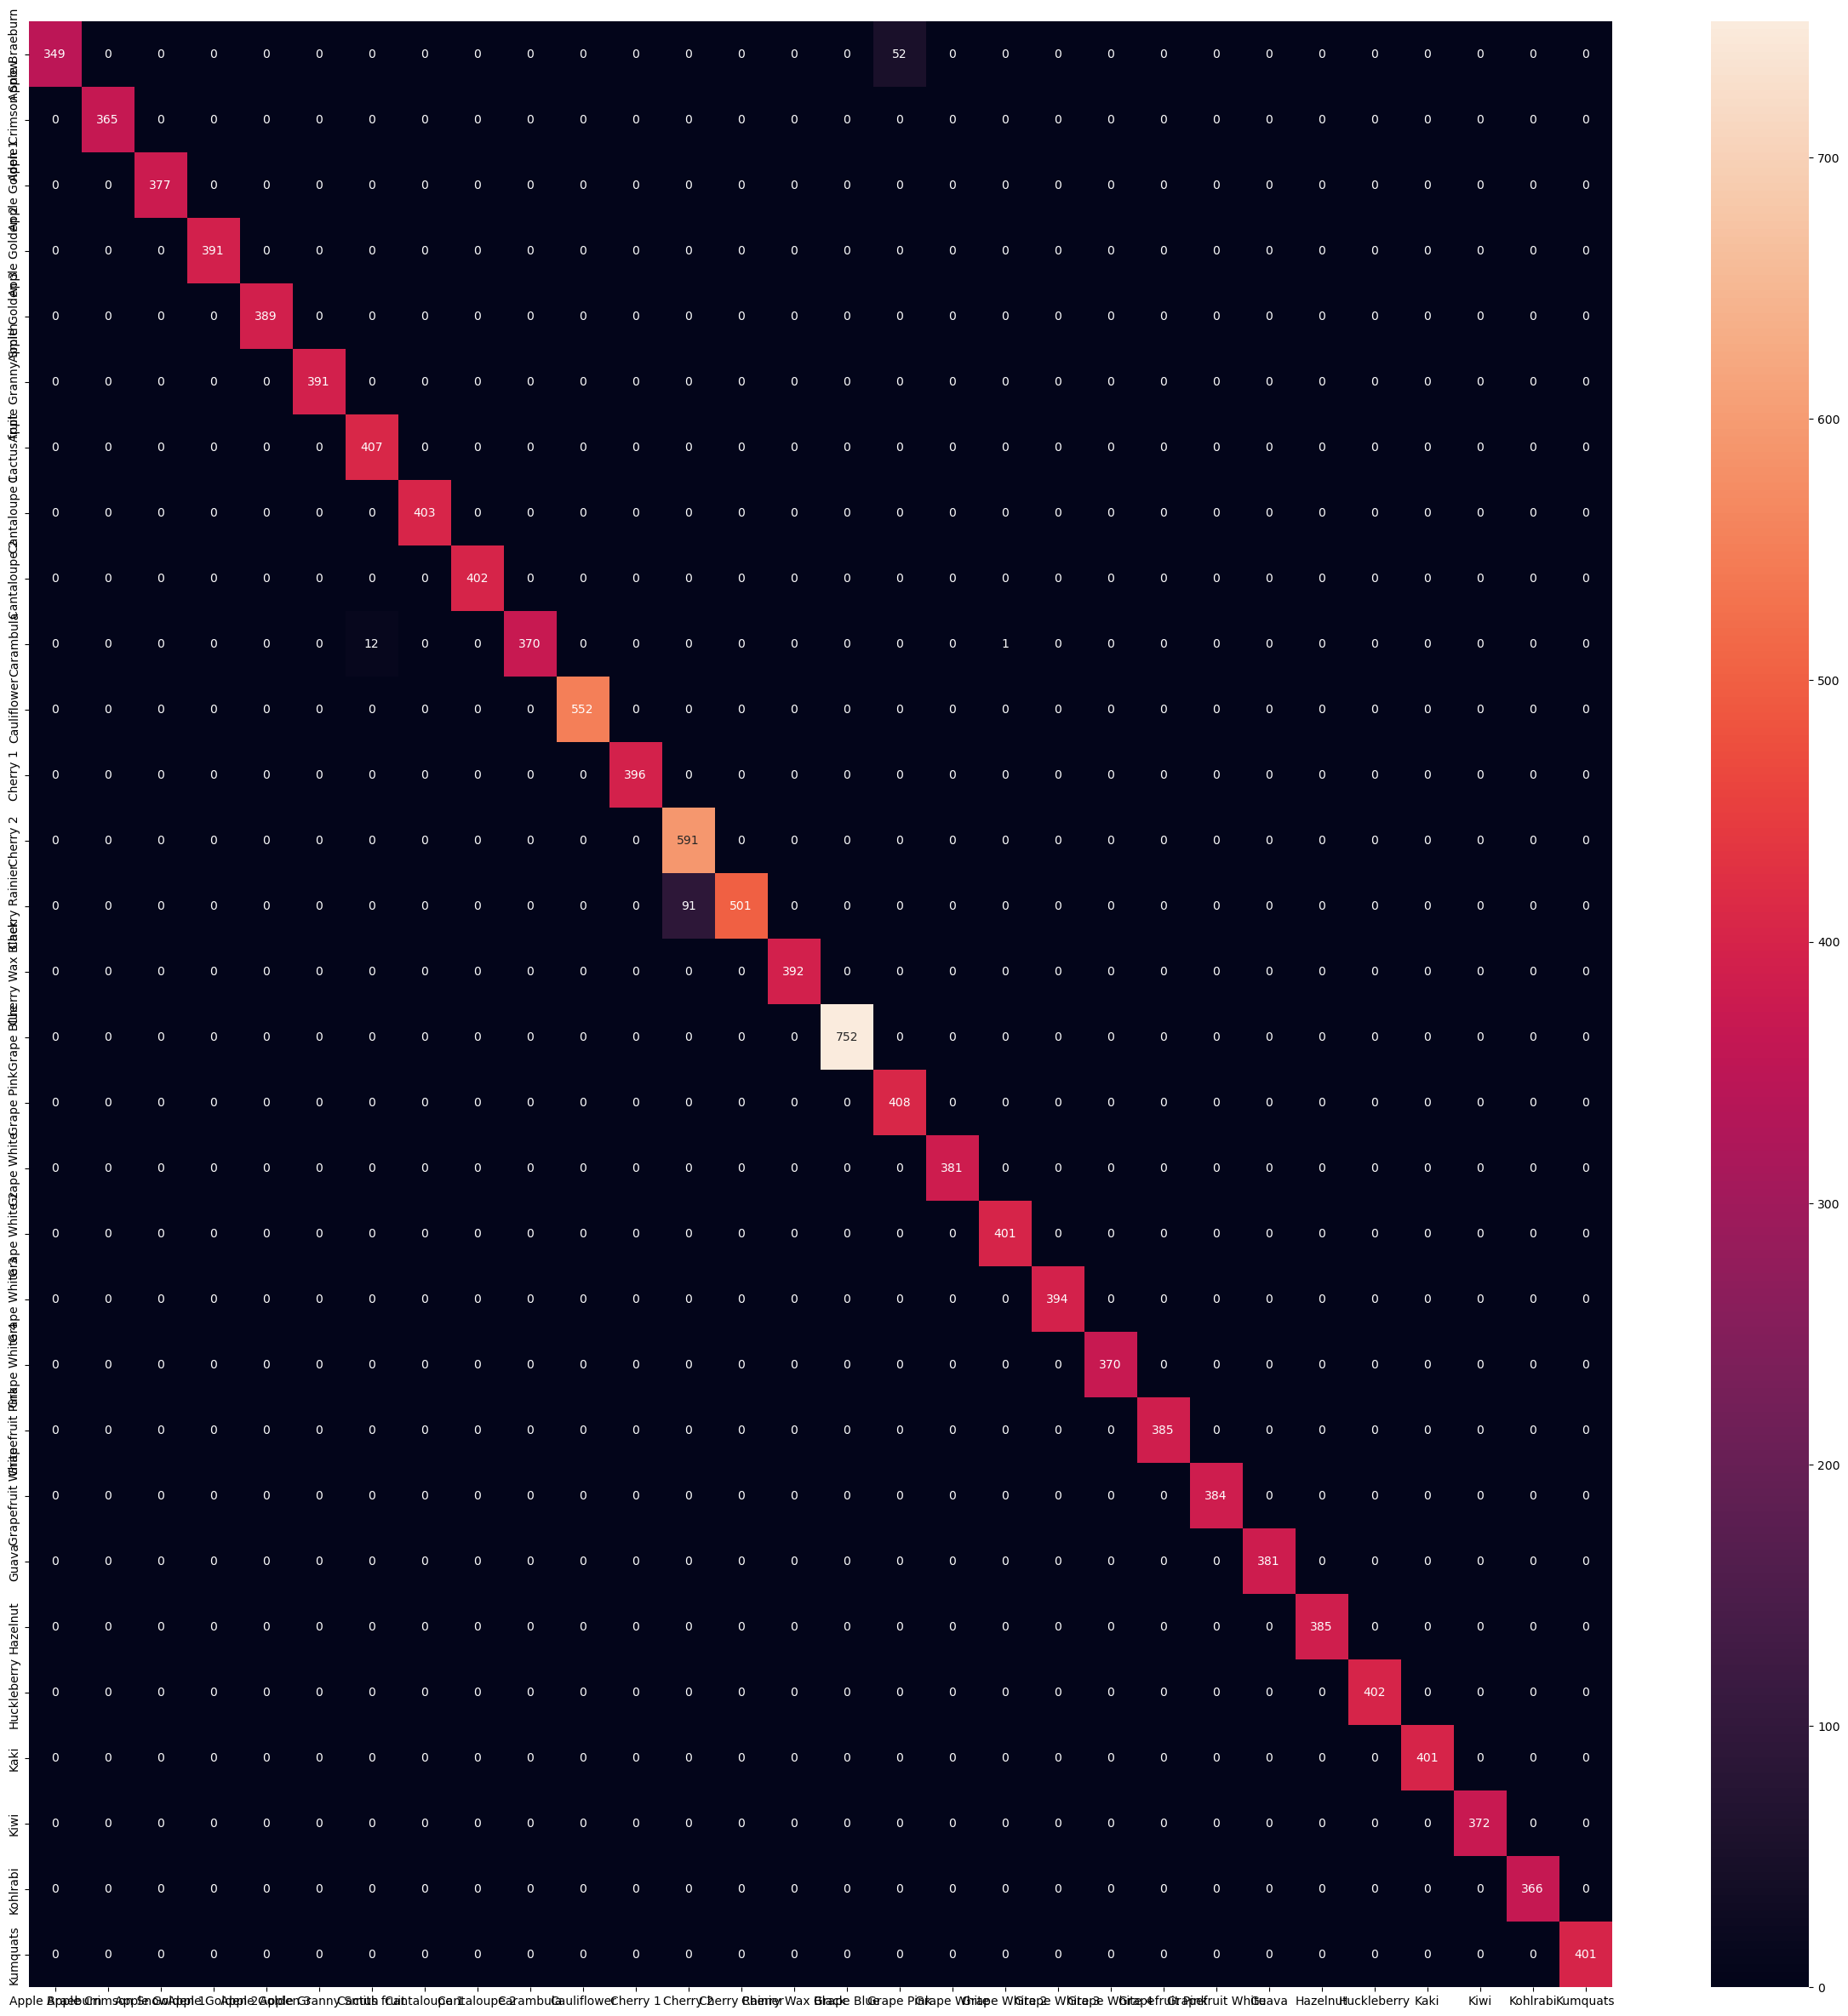

In [23]:
y_pred=model.predict(x_train)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_train,axis=1)
conf_mat=confusion_matrix(y_true,y_pred_classes)
fruit_names=['Apple Braeburn','Apple Crimson Snow','Apple Golden 1','Apple Golden 2',
          'Apple Golden 3','Apple Granny Smith','Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 
           'Cauliflower','Cherry 1','Cherry 2', 'Cherry Rainier', 'Cherry Wax Black',
          'Grape Blue','Grape Pink','Grape White','Grape White 2','Grape White 3','Grape White 4',
           'Grapefruit Pink','Grapefruit White','Guava','Hazelnut','Huckleberry','Kaki','Kiwi','Kohlrabi','Kumquats']
f,ax=plt.subplots(figsize=(30,30))
sns.heatmap(conf_mat,annot=True, fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()